### Notes from http://musicweb.ucsd.edu/~sdubnov/Mu172/Lectures/STFTXsynth.pdf
__Impact of window size and shape__
The window serves several functions:
* It allows controlling the tradeoff between frequency resolution and side-lobe suppression (i.e. how sharp a peak in frequency is versus how high are the sidelobes)
* Using band-limited window allows better “localization” in time-frequency. Note that square window is not band-limited.
* To allow perfect reconstruction the *windows must sum up to 1* (so called COLA condition, to be explained later)

 since we are dealing with
discrete time and discrete frequency signals, multiplication between DFT’s is equivalent
to circular-convolution and NOT linear convolution. We have investigated this topic in
the previous set of notes in relation to fftfilt. We need to assure that the equivalent time
domain impulse response for our desired frequency modification is time-limited so that
we can use a long FFT with zero padding to turn the circular convolution into a linear
(regular) convolution. Unless we can assure that, the result of manipulating the spectral
contents of STFT will result in so called time-aliasing artifact, which is just another name
for circular convolution.

If we perform a filtering operation by cutting off the frequencies outside of the passband,
as described above and go directly to synthesize the signal by ITFT, we actually
implement an ideal passband filter, which has an impulse response nfft long . This means
in fact that in terms of fftfilt operation we are doing the wrong thing since both the signal
window and the filter impulse response are same length as the fft size. Doing such
modification followed by ISTFT will create time-aliasing. 
- the length of the convolution = len(signal) + len(filter impulse response) - 1.
- need to zero-pad both vectors before doing fft convolution




#### E.g. computing acyclic convolution in the freq domain
```
x = [1 2 3 4];
h = [1 1 1];

// conv(x, h) will have length len(x) + len(h) - 1

nx = length(x);
nh = length(h);
nfft = 2^nextpow2(nx+nh-1) // nfft = smallest 2^n >= len(conv(x,h))
xzp = [x, zeros(1,nfft-nx)]; // pad samples until length N > len(conv(x,h))
hzp = [h, zeros(1,nfft-nh)];  // padding is necessary to avoid time-aliasing
X = fft(xzp);  
H = fft(hzp);

Y = H .* X;  // convolution thm states DFT(conv(x,y)) = X .* Y
y = real(ifft(Y)) % zero-padded result
yt = y(1:nx+nh-1) % trim and print
yc = conv(x,h)    % for comparison
```

Computing convolution in freq domain begins being faster than time-domain starting at length `N = 64`

In freq domain: $O(nlgn)$

In time domain: $O(n^2)$

__TODO: figure out OLA window summing__

1. You will be provided a first sketch of the windowed buffering function winbuf.m
The function creates a matrix where every column is a windowed segment of the
original waveform. The signal contents in the columns overlap according to
parameters specified in winbuf function.
2. This function can be modified to create an OLA procedure that reconstructs the
original sound samples from the buffer matrix. The input is the buffer and hop
size. Name the function ola.m


0
16
32
48
64


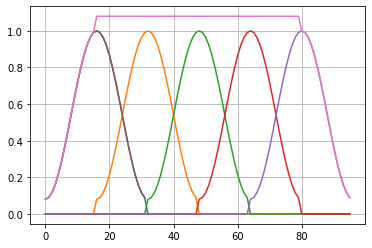

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# COLA Windows

def get_hamming(M):    
    return 0.54 - (0.46*np.cos(2*np.pi* np.arange(M) / M))
"""
M = 33;          % window length
R = (M-1)/2;     % hop size
N = 3*M;         % overlap-add span
w = hamming(M);  % window
z = zeros(N,1);  plot(z,'-k');  hold on;  s = z;
for so=0:R:N-M
  ndx = so+1:so+M;        % current window location
  s(ndx) = s(ndx) + w;    % window overlap-add
  wzp = z; wzp(ndx) = w;  % for plot only 
  plot(wzp,'--ok');       % plot just this window
end
"""
M = np.power(2,5)  # window size
N = 3*M  # total signal length
R = M // 2  # hop size
s = np.zeros(N)
w = get_hamming(M)
for m in range(0,N-M+1,R):
    print(m)
    z = np.zeros(N)
    z[m:m+M] += w
    plt.plot(z)
    s[m:m+M] += w    

plt.plot(get_hamming(M))
plt.plot(s)
plt.grid()
plt.show()















![alt text](img/picture.png "Titlefefef") 
